Cây quyết định là một dạng của lưu đồ (flowchart), giúp chúng ta đưa ra quyết định dựa trên kinh nghiệm có từ trước.

In [ ]:
# Tải các thư viện cần thiết
import pandas as pd
from sklearn import tree
import pydotplus as pdp
from sklearn.tree import DecisionTreeClassifier as classify
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
# Tải dữ liệu
data = pd.read_csv('https://raw.githubusercontent.com/quocthang0507/Machine-Learning/master/Data/shows.csv')
print(data)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [ ]:
# Ánh xạ các cột có chữ thành số
nationality = {'UK': 0, 'USA': 1, 'N': 2}
data['Nationality'] = data['Nationality'].map(nationality)

go = {'NO': 0, 'YES': 1}
data['Go'] = data['Go'].map(go)

print(data)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [ ]:
# Chọn đặc trưng
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = data[features]
y = data[['Go']]

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
    Go
0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    1
8    1
9    1
10   0
11   1
12   1


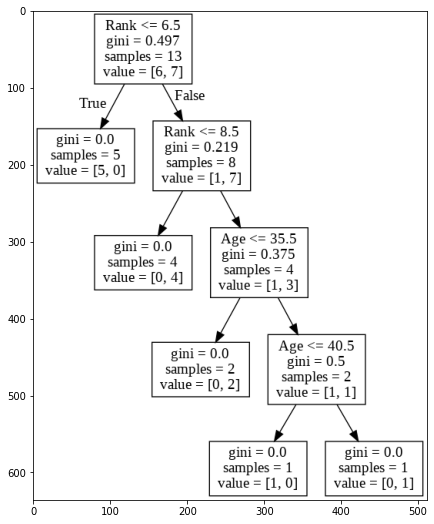

In [ ]:
# Tạo cây quyết định và lưu thành hình ảnh
dtree = classify()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pdp.graph_from_dot_data(data)
graph.write_png('decision tree.png')
# Mở hình ảnh đó lên
image  = img.imread('decision tree.png')
plt.figure(figsize = (16, 9))
plot = plt.imshow(image)
plt.show()

Giải thích ý nghĩa các tham số:
* **Rank <= 6.5**: Nếu giá trị rank nhỏ hơn hoặc bằng 6.5 thì đi sang nhánh bên trái, ngược lại đi sang nhánh bên phải.
* **gini = 0.497**: Là chất lượng của việc tách ra 2 nhánh, giá trị từ 0.0 đến 0.5. Trong đó 0 nghĩa là tất cả các mẫu có cùng một kết quả, 0.5 nghĩa là việc tách ra chính xác ở giữa.
* **samples = 13**: Số mẫu nằm ở nhánh bên trái tại nút đó.
* **value = [6, 7]**: Có 13 mẫu, 6 mẫu 'NO' và 7 'YES'

Cách tính `gini` như sau:
$$\mathrm{gini} = 1 - \left (\frac{x}{n} \right)^2 - \left (\frac{y}{n} \right)^2 $$
Trong đó: $x$ là số mẫu postivies ('YES'), $n$ là tổng số mẫu, $y$ là số mẫu negatives ('NO').
$$\mathrm{gini} = 1 - \left (\frac{7}{13} \right)^2 - \left (\frac{6}{13} \right)^2 \approx 0.497$$

In [ ]:
print(dtree.predict([[40, 10, 7, 1]]))
print(dtree.predict([[40, 10, 6, 1]]))

[1]
[0]
